In [30]:
import numpy as np

In [31]:
import pandas as pd

In [32]:
np.random.seed(42)

In [54]:
apartments=[f'apt_{i}' for i in range(1,21)]

In [55]:
data=pd.date_range(start="2025-11-2",periods=30,freq='D')

In [56]:
date={
    'date':np.tile(data,len(apartments)),
    'apartment':np.repeat(apartments,len(data)),
    'Electicity_usage':np.random.normal(loc=20,scale=5,size=len(data)*len(apartments))
}


In [57]:
df=pd.DataFrame(date)
df

,date,apartment,Electicity_usage
0,2025-11-02,apt_1,23.784943
1,2025-11-03,apt_1,15.389173
2,2025-11-04,apt_1,24.348030
3,2025-11-05,apt_1,26.778189
4,2025-11-06,apt_1,22.067175
...,...,...,...
595,2025-11-27,apt_20,22.202374
596,2025-11-28,apt_20,19.901811
597,2025-11-29,apt_20,22.762450
598,2025-11-30,apt_20,21.119571


In [58]:

df['Electicity_usage']=df['Electicity_usage'].round(2)
df

,date,apartment,Electicity_usage
0,2025-11-02,apt_1,23.78
1,2025-11-03,apt_1,15.39
2,2025-11-04,apt_1,24.35
3,2025-11-05,apt_1,26.78
4,2025-11-06,apt_1,22.07
...,...,...,...
595,2025-11-27,apt_20,22.20
596,2025-11-28,apt_20,19.90
597,2025-11-29,apt_20,22.76
598,2025-11-30,apt_20,21.12


In [59]:
print(df.isnull().sum())

date                0
apartment           0
Electicity_usage    0
dtype: int64


In [60]:
print(df.dtypes)

date                datetime64[ns]
apartment                   object
Electicity_usage           float64
dtype: object


In [61]:
usage_by_apartment=df.groupby('apartment')['Electicity_usage'].sum().sort_values(ascending=True)
#Total usage per apartements
print(usage_by_apartment)

apartment
apt_5     569.29
apt_20    574.35
apt_2     579.73
apt_3     580.50
apt_16    581.55
apt_13    593.52
apt_4     594.34
apt_12    595.18
apt_7     603.80
apt_19    612.43
apt_17    621.55
apt_8     622.74
apt_6     628.77
apt_9     631.90
apt_11    633.26
apt_14    635.35
apt_15    638.42
apt_1     649.73
apt_18    661.94
apt_10    662.58
Name: Electicity_usage, dtype: float64


In [62]:
daily_avg=df.groupby("date")["Electicity_usage"].mean()
print(daily_avg.head())

date
2025-11-02    19.4400
2025-11-03    19.5960
2025-11-04    19.0245
2025-11-05    21.8510
2025-11-06    20.1375
Name: Electicity_usage, dtype: float64


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

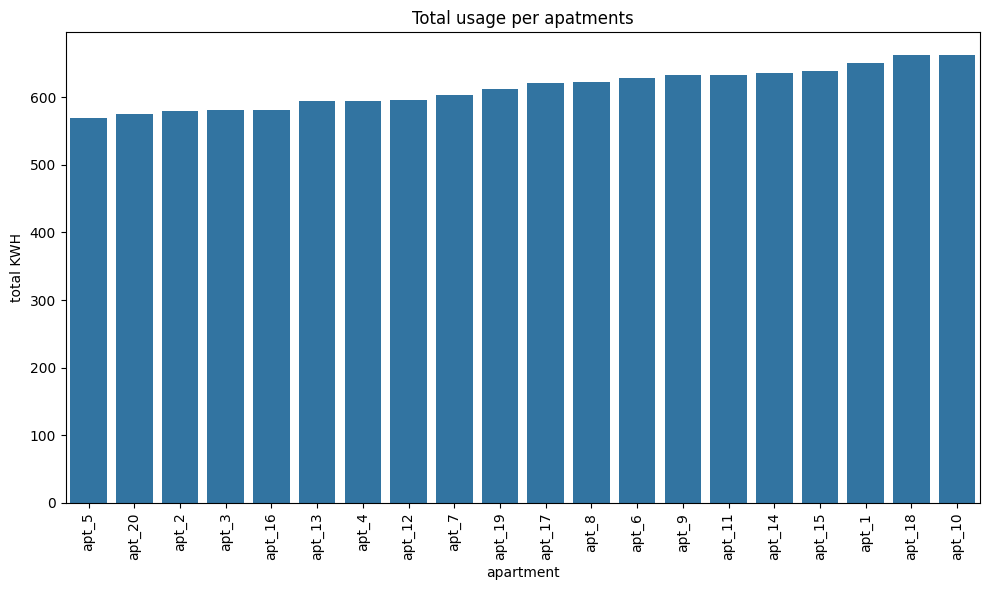

In [68]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_by_apartment.index,y=usage_by_apartment.values)
plt.xticks(rotation=90)
plt.title('Total usage per apatments')
plt.xlabel('apartment')
plt.ylabel('total KWH')
plt.tight_layout()
plt.show()

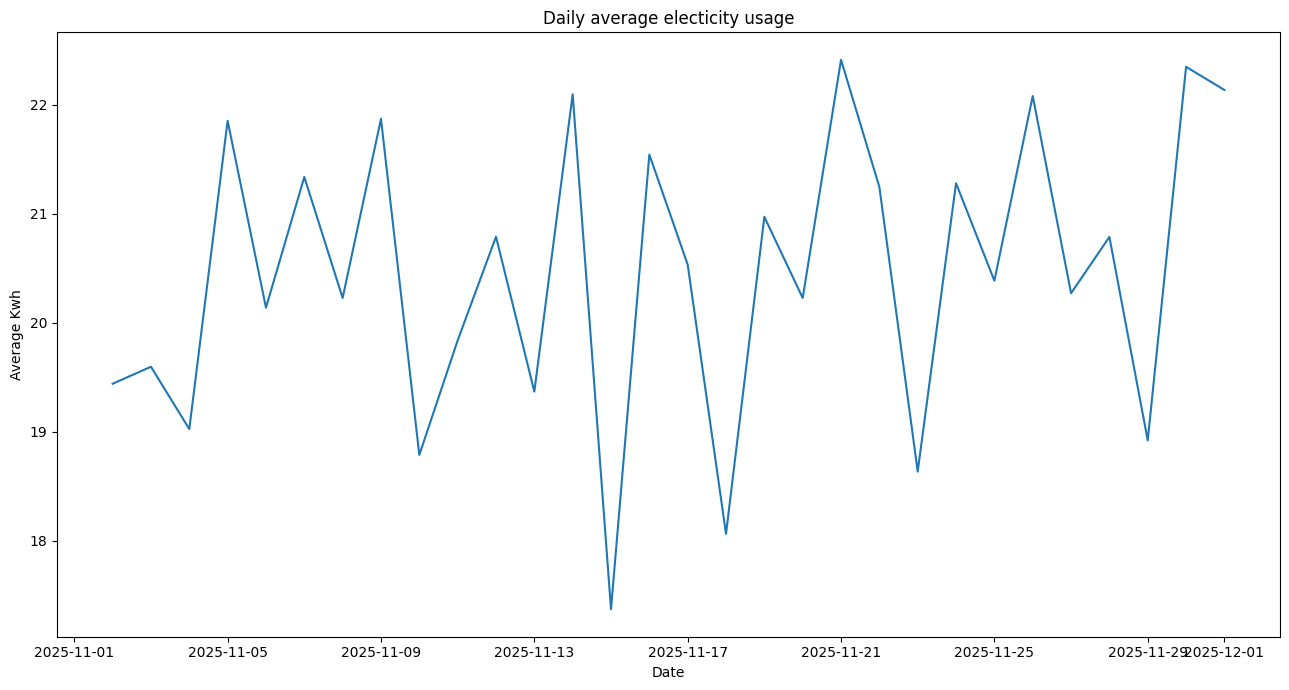

In [72]:
#line plot of daily average
plt.figure(figsize=(13,7))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily average electicity usage")
plt.xlabel("Date")
plt.ylabel("Average Kwh")
plt.tight_layout()
plt.show()


In [74]:
threshold= df["Electicity_usage"].mean()+2 *df["Electicity_usage"].std()
df["High_Usage_flag"]=df["Electicity_usage"] > threshold
print(df[df["High_Usage_flag"]== True].head())

          date apartment  Electicity_usage  High_Usage_flag
14  2025-11-16     apt_1             32.23             True
54  2025-11-26     apt_2             32.87             True
155 2025-11-07     apt_6             33.16             True
162 2025-11-14     apt_6             32.80             True
222 2025-11-14     apt_8             31.49             True
